In [101]:
# STANDARDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
# CUFFLINKS & PLOTLY
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [103]:
df = pd.read_excel(r'C:\Users\krunk\OneDrive\Documents\CPSC 589\Dataset\BBS Dataset.xlsx',sheet_name='ReData')
df.head()

,Patient's Age,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,BBS Sum,Assessment of Risk
0,97,1,0,1,1,1,0,0,1,1,0,0,0,1,1,8,HIGH
1,88,2,0,1,4,3,2,2,3,4,0,1,0,4,4,30,MEDIUM
2,73,3,4,3,2,2,0,2,3,1,0,1,2,4,3,30,MEDIUM
3,77,2,3,1,0,4,4,2,0,1,1,0,2,3,1,24,MEDIUM
4,65,3,4,1,4,4,2,4,4,2,1,2,3,3,4,41,LOW


In [104]:
# SCIKIT SET
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [105]:
rs = 101
lofull = 8192

In [106]:
# ALL ITEMS INCLUDED

In [107]:
X = df.drop(['Patient\'s Age','BBS Sum','Assessment of Risk'],axis=1)
y = df['Assessment of Risk']

ero0= 1566
ers0= 1300


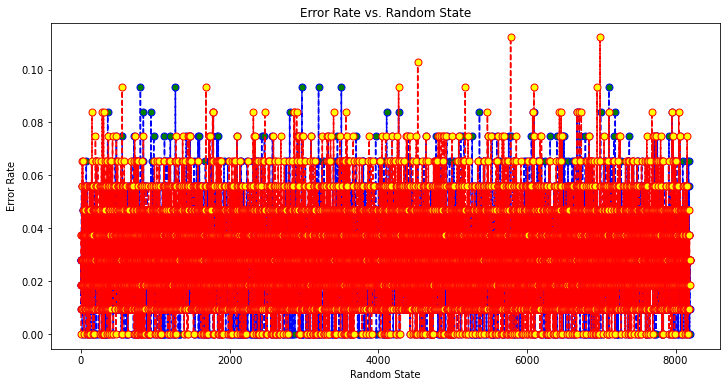

In [8]:
ero = []
ers = []
ero0 = 0
ers0 = 0
lo = lofull

for i in range(1,lo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    
    
    # NO PARAMETER ADJUSTMENT
    model = SVC()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    ero.append(np.mean(y_predict != y_test))
    if np.mean(y_predict != y_test) <= 0.015:
        ero0 += 1
    
    
    # WITH PARAMETER ADJUSTMENT
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
    grid.fit(X_train,y_train)
    grid_predict = grid.predict(X_test)
    ers.append(np.mean(grid_predict != y_test))
    if np.mean(grid_predict != y_test) <= 0.015:
        ers0 += 1
    
    
plt.figure(figsize=(12,6))
plt.plot(range(1,lo),ero,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=7)
plt.plot(range(1,lo),ers,color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=7)
plt.title('Error Rate vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Error Rate')

print('ero0=',ero0)
print('ers0=',ers0)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

In [109]:
# NO PARAMETER ADJUSTMENT
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[34  0  0]
 [ 0 28  1]
 [ 2  0 42]]
              precision    recall  f1-score   support

        HIGH       0.94      1.00      0.97        34
         LOW       1.00      0.97      0.98        29
      MEDIUM       0.98      0.95      0.97        44

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



In [110]:
# WITH PARAMETER ADJUSTMENT
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
grid_predict = grid.predict(X_test)
print('\n')
print(confusion_matrix(y_test,grid_predict))
print(classification_report(y_test,grid_predict))



[[34  0  0]
 [ 0 27  2]
 [ 2  0 42]]
              precision    recall  f1-score   support

        HIGH       0.94      1.00      0.97        34
         LOW       1.00      0.93      0.96        29
      MEDIUM       0.95      0.95      0.95        44

    accuracy                           0.96       107
   macro avg       0.97      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107



In [111]:
# ALL ITEMS WITHOUT PARAMETER ADJUSTMENTS BEST

In [112]:
grid.best_estimator_

SVC(C=0.1, gamma=0.1)

In [113]:
y_predict = y_predict
ex1 = pd.concat([pd.DataFrame(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex1.set_index([['Original','Original','Original','Original','Original','Original'],ex1.index],inplace=True)
ex1

LOW  MEDIUM  HIGH  precision    recall  f1-score  \
Original LOW           28.0     1.0   0.0   1.000000  0.965517  0.982456   
         MEDIUM         0.0    42.0   2.0   0.976744  0.954545  0.965517   
         HIGH           0.0     0.0  34.0   0.944444  1.000000  0.971429   
         accuracy       NaN     NaN   NaN   0.971963  0.971963  0.971963   
         macro avg      NaN     NaN   NaN   0.973730  0.973354  0.973134   
         weighted avg   NaN     NaN   NaN   0.972784  0.971963  0.971987   

                          support  
Original LOW            29.000000  
         MEDIUM         44.000000  
         HIGH           34.000000  
         accuracy        0.971963  
         macro avg     107.000000  
         weighted avg  107.000000

In [114]:
# HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS)

In [115]:
X = df[['Item 5','Item 9','Item 10','Item 11']]
y = df['Assessment of Risk']
text = 'HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS)'

ero0= 0
ers0= 0


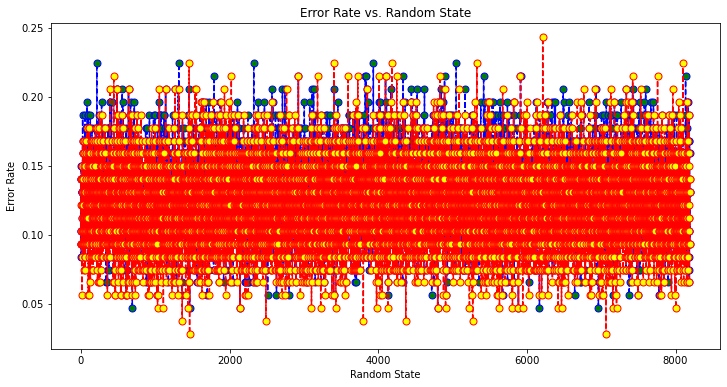

In [16]:
ero = []
ers = []
ero0 = 0
ers0 = 0
lo = lofull

for i in range(1,lo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    
    
    # NO PARAMETER ADJUSTMENT
    model = SVC()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    ero.append(np.mean(y_predict != y_test))
    if np.mean(y_predict != y_test) <= 0.015:
        ero0 += 1
    
    
    # WITH PARAMETER ADJUSTMENT
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
    grid.fit(X_train,y_train)
    grid_predict = grid.predict(X_test)
    ers.append(np.mean(grid_predict != y_test))
    if np.mean(grid_predict != y_test) <= 0.015:
        ers0 += 1
    
    
plt.figure(figsize=(12,6))
plt.plot(range(1,lo),ero,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=7)
plt.plot(range(1,lo),ers,color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=7)
plt.title('Error Rate vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Error Rate')

print('ero0=',ero0)
print('ers0=',ers0)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

In [117]:
# NO PARAMETER ADJUSTMENT
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[34  0  0]
 [ 0 23  6]
 [ 4  3 37]]
              precision    recall  f1-score   support

        HIGH       0.89      1.00      0.94        34
         LOW       0.88      0.79      0.84        29
      MEDIUM       0.86      0.84      0.85        44

    accuracy                           0.88       107
   macro avg       0.88      0.88      0.88       107
weighted avg       0.88      0.88      0.88       107



In [118]:
# WITH PARAMETER ADJUSTMENT
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
grid_predict = grid.predict(X_test)
print('\n')
print(confusion_matrix(y_test,grid_predict))
print(classification_report(y_test,grid_predict))



[[34  0  0]
 [ 0 27  2]
 [ 5  5 34]]
              precision    recall  f1-score   support

        HIGH       0.87      1.00      0.93        34
         LOW       0.84      0.93      0.89        29
      MEDIUM       0.94      0.77      0.85        44

    accuracy                           0.89       107
   macro avg       0.89      0.90      0.89       107
weighted avg       0.89      0.89      0.89       107



In [119]:
# HIGH CORR TOP 4 WITH NO PARAMETER ADJUSTMENT BEST

In [120]:
grid.best_estimator_

SVC(C=0.1, gamma=0.1)

In [121]:
y_predict = y_predict
ex6 = pd.concat([pd.DataFrame(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex6.set_index([[text,text,text,text,text,text],ex6.index],inplace=True)
ex6

LOW  MEDIUM  \
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW           23.0     6.0   
                                                 MEDIUM         3.0    37.0   
                                                 HIGH           0.0     0.0   
                                                 accuracy       NaN     NaN   
                                                 macro avg      NaN     NaN   
                                                 weighted avg   NaN     NaN   

                                                               HIGH  \
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW            0.0   
                                                 MEDIUM         4.0   
                                                 HIGH          34.0   
                                                 accuracy       NaN   
                                                 macro avg      NaN   
                                                 weighted avg   NaN   

                                                               precision  \
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW            0.884615   
                                                 MEDIUM         0.860465   
                                                 HIGH           0.894737   
                                                 accuracy       0.878505   
                                                 macro avg      0.879939   
                                                 weighted avg   0.877901   

                                                                 recall  \
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW           0.793103   
                                                 MEDIUM        0.840909   
                                                 HIGH          1.000000   
                                                 accuracy      0.878505   
                                                 macro avg     0.878004   
                                                 weighted avg  0.878505   

                                                               f1-score  \
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW           0.836364   
                                                 MEDIUM        0.850575   
                                                 HIGH          0.944444   
                                                 accuracy      0.878505   
                                                 macro avg     0.877128   
                                                 weighted avg  0.876551   

                                                                  support  
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW            29.000000  
                                                 MEDIUM         44.000000  
                                                 HIGH           34.000000  
                                                 accuracy        0.878505  
                                                 macro avg     107.000000  
                                                 weighted avg  107.000000

In [122]:
# HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)

In [123]:
X = df[['Item 5','Item 8','Item 9','Item 10','Item 11']]
y = df['Assessment of Risk']

ero0= 61
ers0= 56


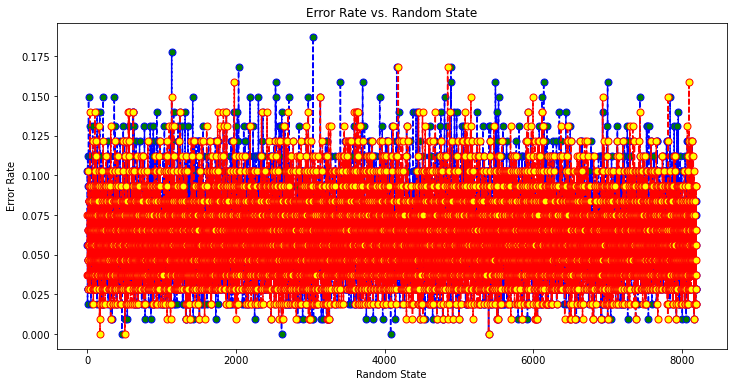

In [24]:
ero = []
ers = []
ero0 = 0
ers0 = 0
lo = lofull

for i in range(1,lo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    
    
    # NO PARAMETER ADJUSTMENT
    model = SVC()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    ero.append(np.mean(y_predict != y_test))
    if np.mean(y_predict != y_test) <= 0.015:
        ero0 += 1
    
    
    # WITH PARAMETER ADJUSTMENT
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
    grid.fit(X_train,y_train)
    grid_predict = grid.predict(X_test)
    ers.append(np.mean(grid_predict != y_test))
    if np.mean(grid_predict != y_test) <= 0.015:
        ers0 += 1
    
    
plt.figure(figsize=(12,6))
plt.plot(range(1,lo),ero,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=7)
plt.plot(range(1,lo),ers,color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=7)
plt.title('Error Rate vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Error Rate')

print('ero0=',ero0)
print('ers0=',ers0)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

In [125]:
# NO PARAMETER ADJUSTMENT
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[34  0  0]
 [ 0 29  0]
 [ 1  4 39]]
              precision    recall  f1-score   support

        HIGH       0.97      1.00      0.99        34
         LOW       0.88      1.00      0.94        29
      MEDIUM       1.00      0.89      0.94        44

    accuracy                           0.95       107
   macro avg       0.95      0.96      0.95       107
weighted avg       0.96      0.95      0.95       107



In [126]:
# WITH PARAMETER ADJUSTMENT
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
grid_predict = grid.predict(X_test)
print('\n')
print(confusion_matrix(y_test,grid_predict))
print(classification_report(y_test,grid_predict))



[[33  0  1]
 [ 0 29  0]
 [ 0  2 42]]
              precision    recall  f1-score   support

        HIGH       1.00      0.97      0.99        34
         LOW       0.94      1.00      0.97        29
      MEDIUM       0.98      0.95      0.97        44

    accuracy                           0.97       107
   macro avg       0.97      0.98      0.97       107
weighted avg       0.97      0.97      0.97       107



In [127]:
# HIGH CORR TOP 5 WITH NO PARAMETER ADJUSTMENT BEST

In [128]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [129]:
y_predict = y_predict
ex2 = pd.concat([pd.DataFrame(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex2.set_index([['HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)'],ex2.index],inplace=True)
ex2

LOW  MEDIUM  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW           29.0     0.0   
                                                   MEDIUM         4.0    39.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   

                                                                 HIGH  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW            0.0   
                                                   MEDIUM         1.0   
                                                   HIGH          34.0   
                                                   accuracy       NaN   
                                                   macro avg      NaN   
                                                   weighted avg   NaN   

                                                                 precision  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW            0.878788   
                                                   MEDIUM         1.000000   
                                                   HIGH           0.971429   
                                                   accuracy       0.953271   
                                                   macro avg      0.950072   
                                                   weighted avg   0.958069   

                                                                   recall  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW           1.000000   
                                                   MEDIUM        0.886364   
                                                   HIGH          1.000000   
                                                   accuracy      0.953271   
                                                   macro avg     0.962121   
                                                   weighted avg  0.953271   

                                                                 f1-score  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW           0.935484   
                                                   MEDIUM        0.939759   
                                                   HIGH          0.985507   
                                                   accuracy      0.953271   
                                                   macro avg     0.953583   
                                                   weighted avg  0.953137   

                                                                    support  
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW            29.000000  
                                                   MEDIUM         44.000000  
                                                   HIGH           34.000000  
                                                   accuracy        0.953271  
                                                   macro avg     107.000000  
                                                   weighted avg  107.000000

In [130]:
# HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)

In [131]:
X = df[['Item 5','Item 7','Item 8','Item 9','Item 10','Item 11']]
y = df['Assessment of Risk']

ero0= 297
ers0= 254


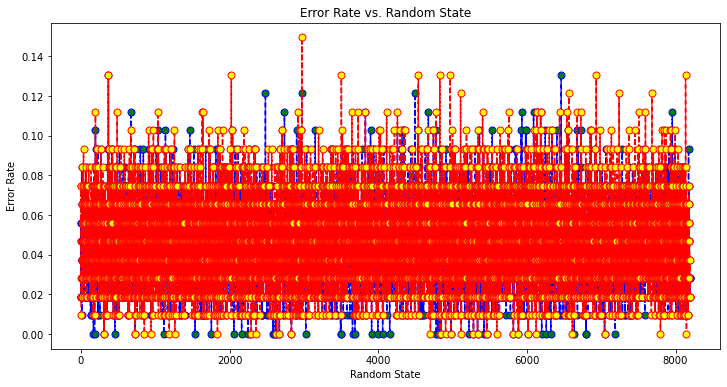

In [32]:
ero = []
ers = []
ero0 = 0
ers0 = 0
lo = lofull

for i in range(1,lo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    
    
    # NO PARAMETER ADJUSTMENT
    model = SVC()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    ero.append(np.mean(y_predict != y_test))
    if np.mean(y_predict != y_test) <= 0.015:
        ero0 += 1
    
    
    # WITH PARAMETER ADJUSTMENT
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
    grid.fit(X_train,y_train)
    grid_predict = grid.predict(X_test)
    ers.append(np.mean(grid_predict != y_test))
    if np.mean(grid_predict != y_test) <= 0.015:
        ers0 += 1
    
    
plt.figure(figsize=(12,6))
plt.plot(range(1,lo),ero,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=7)
plt.plot(range(1,lo),ers,color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=7)
plt.title('Error Rate vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Error Rate')

print('ero0=',ero0)
print('ers0=',ers0)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

In [133]:
# NO PARAMETER ADJUSTMENT
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[33  0  1]
 [ 0 28  1]
 [ 1  2 41]]
              precision    recall  f1-score   support

        HIGH       0.97      0.97      0.97        34
         LOW       0.93      0.97      0.95        29
      MEDIUM       0.95      0.93      0.94        44

    accuracy                           0.95       107
   macro avg       0.95      0.96      0.95       107
weighted avg       0.95      0.95      0.95       107



In [134]:
# WITH PARAMETER ADJUSTMENT
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
grid_predict = grid.predict(X_test)
print('\n')
print(confusion_matrix(y_test,grid_predict))
print(classification_report(y_test,grid_predict))



[[32  0  2]
 [ 0 28  1]
 [ 1  0 43]]
              precision    recall  f1-score   support

        HIGH       0.97      0.94      0.96        34
         LOW       1.00      0.97      0.98        29
      MEDIUM       0.93      0.98      0.96        44

    accuracy                           0.96       107
   macro avg       0.97      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107



In [135]:
# HIGH CORR TOP 6 WITH NO PARAMETER ADJUSTMENT BEST

In [136]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [137]:
y_predict = y_predict
ex3 = pd.concat([pd.DataFrame(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex3.set_index([['HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)'],ex3.index],inplace=True)
ex3

LOW  MEDIUM  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW           28.0     1.0   
                                                   MEDIUM         2.0    41.0   
                                                   HIGH           0.0     1.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   

                                                                 HIGH  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW            0.0   
                                                   MEDIUM         1.0   
                                                   HIGH          33.0   
                                                   accuracy       NaN   
                                                   macro avg      NaN   
                                                   weighted avg   NaN   

                                                                 precision  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW            0.933333   
                                                   MEDIUM         0.953488   
                                                   HIGH           0.970588   
                                                   accuracy       0.953271   
                                                   macro avg      0.952470   
                                                   weighted avg   0.953459   

                                                                   recall  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW           0.965517   
                                                   MEDIUM        0.931818   
                                                   HIGH          0.970588   
                                                   accuracy      0.953271   
                                                   macro avg     0.955975   
                                                   weighted avg  0.953271   

                                                                 f1-score  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW           0.949153   
                                                   MEDIUM        0.942529   
                                                   HIGH          0.970588   
                                                   accuracy      0.953271   
                                                   macro avg     0.954090   
                                                   weighted avg  0.953240   

                                                                    support  
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW            29.000000  
                                                   MEDIUM         44.000000  
                                                   HIGH           34.000000  
                                                   accuracy        0.953271  
                                                   macro avg     107.000000  
                                                   weighted avg  107.000000

In [138]:
# DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)

In [139]:
X = df[['Item 4','Item 8','Item 10','Item 11','Item 12','Item 14']]
y = df['Assessment of Risk']

ero0= 14
ers0= 6


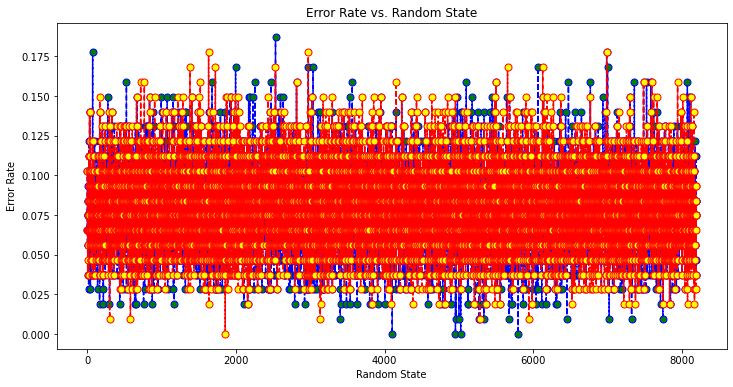

In [40]:
ero = []
ers = []
ero0 = 0
ers0 = 0
lo = lofull

for i in range(1,lo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    
    
    # NO PARAMETER ADJUSTMENT
    model = SVC()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    ero.append(np.mean(y_predict != y_test))
    if np.mean(y_predict != y_test) <= 0.015:
        ero0 += 1
    
    
    # WITH PARAMETER ADJUSTMENT
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
    grid.fit(X_train,y_train)
    grid_predict = grid.predict(X_test)
    ers.append(np.mean(grid_predict != y_test))
    if np.mean(grid_predict != y_test) <= 0.015:
        ers0 += 1
    
    
plt.figure(figsize=(12,6))
plt.plot(range(1,lo),ero,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=7)
plt.plot(range(1,lo),ers,color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=7)
plt.title('Error Rate vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Error Rate')

print('ero0=',ero0)
print('ers0=',ers0)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

In [141]:
# NO PARAMETER ADJUSTMENT
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[33  0  1]
 [ 0 29  0]
 [ 1  5 38]]
              precision    recall  f1-score   support

        HIGH       0.97      0.97      0.97        34
         LOW       0.85      1.00      0.92        29
      MEDIUM       0.97      0.86      0.92        44

    accuracy                           0.93       107
   macro avg       0.93      0.94      0.94       107
weighted avg       0.94      0.93      0.93       107



In [142]:
# WITH PARAMETER ADJUSTMENT
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
grid_predict = grid.predict(X_test)
print('\n')
print(confusion_matrix(y_test,grid_predict))
print(classification_report(y_test,grid_predict))



[[30  0  4]
 [ 0 27  2]
 [ 1  2 41]]
              precision    recall  f1-score   support

        HIGH       0.97      0.88      0.92        34
         LOW       0.93      0.93      0.93        29
      MEDIUM       0.87      0.93      0.90        44

    accuracy                           0.92       107
   macro avg       0.92      0.92      0.92       107
weighted avg       0.92      0.92      0.92       107



In [143]:
#DS PRACTICAL PICK WITHOUT PARAMETER ADJUSTMENTS

In [144]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [145]:
y_predict = y_predict
ex4 = pd.concat([pd.DataFrame(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex4.set_index([['DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)'],ex4.index],inplace=True)
ex4

LOW  MEDIUM  \
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW           29.0     0.0   
                                                  MEDIUM         5.0    38.0   
                                                  HIGH           0.0     1.0   
                                                  accuracy       NaN     NaN   
                                                  macro avg      NaN     NaN   
                                                  weighted avg   NaN     NaN   

                                                                HIGH  \
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW            0.0   
                                                  MEDIUM         1.0   
                                                  HIGH          33.0   
                                                  accuracy       NaN   
                                                  macro avg      NaN   
                                                  weighted avg   NaN   

                                                                precision  \
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW            0.852941   
                                                  MEDIUM         0.974359   
                                                  HIGH           0.970588   
                                                  accuracy       0.934579   
                                                  macro avg      0.932629   
                                                  weighted avg   0.940253   

                                                                  recall  \
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW           1.000000   
                                                  MEDIUM        0.863636   
                                                  HIGH          0.970588   
                                                  accuracy      0.934579   
                                                  macro avg     0.944742   
                                                  weighted avg  0.934579   

                                                                f1-score  \
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW           0.920635   
                                                  MEDIUM        0.915663   
                                                  HIGH          0.970588   
                                                  accuracy      0.934579   
                                                  macro avg     0.935629   
                                                  weighted avg  0.934463   

                                                                   support  
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW            29.000000  
                                                  MEDIUM         44.000000  
                                                  HIGH           34.000000  
                                                  accuracy        0.934579  
                                                  macro avg     107.000000  
                                                  weighted avg  107.000000

In [146]:
# HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)

In [147]:
X = df[['Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11']]
y = df['Assessment of Risk']

ero0= 339
ers0= 231


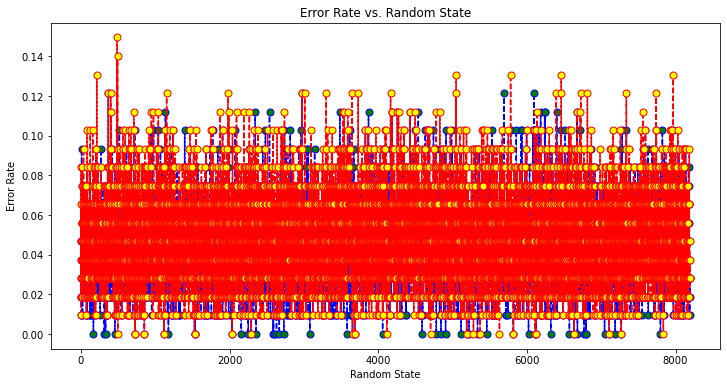

In [48]:
ero = []
ers = []
ero0 = 0
ers0 = 0
lo = lofull

for i in range(1,lo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    
    
    # NO PARAMETER ADJUSTMENT
    model = SVC()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    ero.append(np.mean(y_predict != y_test))
    if np.mean(y_predict != y_test) <= 0.015:
        ero0 += 1
    
    
    # WITH PARAMETER ADJUSTMENT
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
    grid.fit(X_train,y_train)
    grid_predict = grid.predict(X_test)
    ers.append(np.mean(grid_predict != y_test))
    if np.mean(grid_predict != y_test) <= 0.015:
        ers0 += 1
    
    
plt.figure(figsize=(12,6))
plt.plot(range(1,lo),ero,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=7)
plt.plot(range(1,lo),ers,color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=7)
plt.title('Error Rate vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Error Rate')

print('ero0=',ero0)
print('ers0=',ers0)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

In [149]:
# NO PARAMETER ADJUSTMENT
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[33  0  1]
 [ 0 28  1]
 [ 0  1 43]]
              precision    recall  f1-score   support

        HIGH       1.00      0.97      0.99        34
         LOW       0.97      0.97      0.97        29
      MEDIUM       0.96      0.98      0.97        44

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



In [150]:
# WITH PARAMETER ADJUSTMENT
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
grid_predict = grid.predict(X_test)
print('\n')
print(confusion_matrix(y_test,grid_predict))
print(classification_report(y_test,grid_predict))



[[32  0  2]
 [ 0 28  1]
 [ 0  2 42]]
              precision    recall  f1-score   support

        HIGH       1.00      0.94      0.97        34
         LOW       0.93      0.97      0.95        29
      MEDIUM       0.93      0.95      0.94        44

    accuracy                           0.95       107
   macro avg       0.96      0.95      0.95       107
weighted avg       0.95      0.95      0.95       107



In [151]:
# HIGH CORR TOP 7 WITHOUT PARAMETER ADJUSTMENTS BEST

In [152]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [153]:
y_predict = y_predict
ex5 = pd.concat([pd.DataFrame(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex5.set_index([['HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)'],ex5.index],inplace=True)
ex5

LOW  MEDIUM  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW           28.0     1.0   
                                                   MEDIUM         1.0    43.0   
                                                   HIGH           0.0     1.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   

                                                                 HIGH  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW            0.0   
                                                   MEDIUM         0.0   
                                                   HIGH          33.0   
                                                   accuracy       NaN   
                                                   macro avg      NaN   
                                                   weighted avg   NaN   

                                                                 precision  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW            0.965517   
                                                   MEDIUM         0.955556   
                                                   HIGH           1.000000   
                                                   accuracy       0.971963   
                                                   macro avg      0.973691   
                                                   weighted avg   0.972378   

                                                                   recall  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW           0.965517   
                                                   MEDIUM        0.977273   
                                                   HIGH          0.970588   
                                                   accuracy      0.971963   
                                                   macro avg     0.971126   
                                                   weighted avg  0.971963   

                                                                 f1-score  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW           0.965517   
                                                   MEDIUM        0.966292   
                                                   HIGH          0.985075   
                                                   accuracy      0.971963   
                                                   macro avg     0.972295   
                                                   weighted avg  0.972050   

                                                                    support  
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW            29.000000  
                                                   MEDIUM         44.000000  
                                                   HIGH           34.000000  
                                                   accuracy        0.971963  
                                                   macro avg     107.000000  
                                                   weighted avg  107.000000

In [154]:
# HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TOTAL ITEMS)

In [155]:
X = df[['Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11','Item 12']]
y = df['Assessment of Risk']
text = 'HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TOTAL ITEMS)'

ero0= 308
ers0= 228


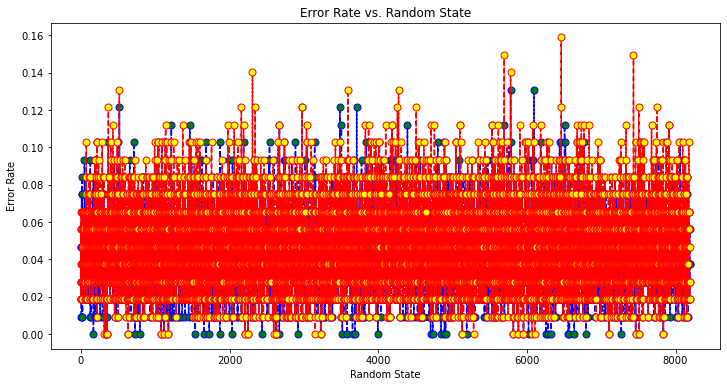

In [56]:
ero = []
ers = []
ero0 = 0
ers0 = 0
lo = lofull

for i in range(1,lo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    
    
    # NO PARAMETER ADJUSTMENT
    model = SVC()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    ero.append(np.mean(y_predict != y_test))
    if np.mean(y_predict != y_test) <= 0.015:
        ero0 += 1
    
    
    # WITH PARAMETER ADJUSTMENT
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
    grid.fit(X_train,y_train)
    grid_predict = grid.predict(X_test)
    ers.append(np.mean(grid_predict != y_test))
    if np.mean(grid_predict != y_test) <= 0.015:
        ers0 += 1
    
    
plt.figure(figsize=(12,6))
plt.plot(range(1,lo),ero,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=7)
plt.plot(range(1,lo),ers,color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=7)
plt.title('Error Rate vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Error Rate')

print('ero0=',ero0)
print('ers0=',ers0)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

In [157]:
# NO PARAMETER ADJUSTMENT
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[34  0  0]
 [ 0 28  1]
 [ 0  1 43]]
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00        34
         LOW       0.97      0.97      0.97        29
      MEDIUM       0.98      0.98      0.98        44

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107



In [158]:
# WITH PARAMETER ADJUSTMENT
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
grid_predict = grid.predict(X_test)
print('\n')
print(confusion_matrix(y_test,grid_predict))
print(classification_report(y_test,grid_predict))



[[33  0  1]
 [ 0 28  1]
 [ 0  1 43]]
              precision    recall  f1-score   support

        HIGH       1.00      0.97      0.99        34
         LOW       0.97      0.97      0.97        29
      MEDIUM       0.96      0.98      0.97        44

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



In [159]:
# HIGH CORR TOP 8 WITH NO PARAMETER ADJUSTMENT BEST

In [160]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [161]:
y_predict = y_predict
ex7 = pd.concat([pd.DataFrame(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex7.set_index([[text,text,text,text,text,text],ex7.index],inplace=True)
ex7

LOW  MEDIUM  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW           28.0     1.0   
                                                   MEDIUM         1.0    43.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   

                                                                 HIGH  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW            0.0   
                                                   MEDIUM         0.0   
                                                   HIGH          34.0   
                                                   accuracy       NaN   
                                                   macro avg      NaN   
                                                   weighted avg   NaN   

                                                                 precision  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW            0.965517   
                                                   MEDIUM         0.977273   
                                                   HIGH           1.000000   
                                                   accuracy       0.981308   
                                                   macro avg      0.980930   
                                                   weighted avg   0.981308   

                                                                   recall  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW           0.965517   
                                                   MEDIUM        0.977273   
                                                   HIGH          1.000000   
                                                   accuracy      0.981308   
                                                   macro avg     0.980930   
                                                   weighted avg  0.981308   

                                                                 f1-score  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW           0.965517   
                                                   MEDIUM        0.977273   
                                                   HIGH          1.000000   
                                                   accuracy      0.981308   
                                                   macro avg     0.980930   
                                                   weighted avg  0.981308   

                                                                    support  
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW            29.000000  
                                                   MEDIUM         44.000000  
                                                   HIGH           34.000000  
                                                   accuracy        0.981308  
                                                   macro avg     107.000000  
                                                   weighted avg  107.000000

In [162]:
# HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9 TOTAL ITEMS)

In [163]:
X = df[['Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11','Item 12','Item 13']]
y = df['Assessment of Risk']
text = 'HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9 TOTAL ITEMS)'

ero0= 372
ers0= 278


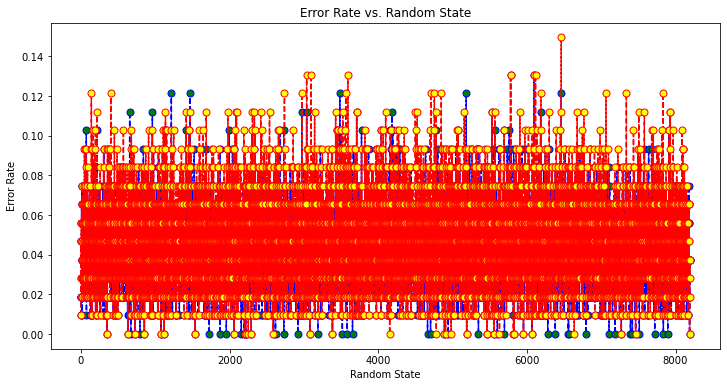

In [64]:
ero = []
ers = []
ero0 = 0
ers0 = 0
lo = lofull

for i in range(1,lo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    
    
    # NO PARAMETER ADJUSTMENT
    model = SVC()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    ero.append(np.mean(y_predict != y_test))
    if np.mean(y_predict != y_test) <= 0.015:
        ero0 += 1
    
    
    # WITH PARAMETER ADJUSTMENT
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
    grid.fit(X_train,y_train)
    grid_predict = grid.predict(X_test)
    ers.append(np.mean(grid_predict != y_test))
    if np.mean(grid_predict != y_test) <= 0.015:
        ers0 += 1
    
    
plt.figure(figsize=(12,6))
plt.plot(range(1,lo),ero,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=7)
plt.plot(range(1,lo),ers,color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=7)
plt.title('Error Rate vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Error Rate')

print('ero0=',ero0)
print('ers0=',ers0)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

In [165]:
# NO PARAMETER ADJUSTMENT
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[34  0  0]
 [ 0 28  1]
 [ 1  1 42]]
              precision    recall  f1-score   support

        HIGH       0.97      1.00      0.99        34
         LOW       0.97      0.97      0.97        29
      MEDIUM       0.98      0.95      0.97        44

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



In [166]:
# WITH PARAMETER ADJUSTMENT
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
grid_predict = grid.predict(X_test)
print('\n')
print(confusion_matrix(y_test,grid_predict))
print(classification_report(y_test,grid_predict))



[[34  0  0]
 [ 0 28  1]
 [ 1  1 42]]
              precision    recall  f1-score   support

        HIGH       0.97      1.00      0.99        34
         LOW       0.97      0.97      0.97        29
      MEDIUM       0.98      0.95      0.97        44

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107



In [167]:
# HIGH CORR TOP 9 WITH NO PARAMETER ADJUSTMENT BEST

In [168]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [169]:
y_predict = y_predict
ex8 = pd.concat([pd.DataFrame(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex8.set_index([[text,text,text,text,text,text],ex8.index],inplace=True)
ex8

LOW  MEDIUM  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW           28.0     1.0   
                                                   MEDIUM         1.0    42.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   

                                                                 HIGH  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW            0.0   
                                                   MEDIUM         1.0   
                                                   HIGH          34.0   
                                                   accuracy       NaN   
                                                   macro avg      NaN   
                                                   weighted avg   NaN   

                                                                 precision  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW            0.965517   
                                                   MEDIUM         0.976744   
                                                   HIGH           0.971429   
                                                   accuracy       0.971963   
                                                   macro avg      0.971230   
                                                   weighted avg   0.972012   

                                                                   recall  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW           0.965517   
                                                   MEDIUM        0.954545   
                                                   HIGH          1.000000   
                                                   accuracy      0.971963   
                                                   macro avg     0.973354   
                                                   weighted avg  0.971963   

                                                                 f1-score  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW           0.965517   
                                                   MEDIUM        0.965517   
                                                   HIGH          0.985507   
                                                   accuracy      0.971963   
                                                   macro avg     0.972181   
                                                   weighted avg  0.971869   

                                                                    support  
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW            29.000000  
                                                   MEDIUM         44.000000  
                                                   HIGH           34.000000  
                                                   accuracy        0.971963  
                                                   macro avg     107.000000  
                                                   weighted avg  107.000000

In [170]:
# HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4 (10 TOTAL ITEMS)

In [171]:
X = df[['Item 4','Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11','Item 12','Item 13']]
y = df['Assessment of Risk']
text = 'HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4 (10 TOTAL ITEMS)'

ero0= 879
ers0= 1078


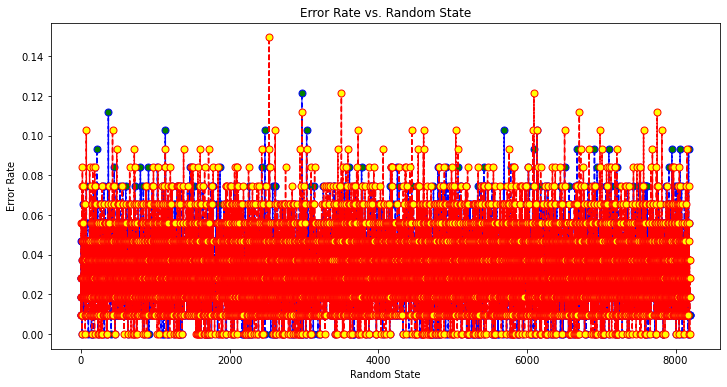

In [72]:
ero = []
ers = []
ero0 = 0
ers0 = 0
lo = lofull

for i in range(1,lo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    
    
    # NO PARAMETER ADJUSTMENT
    model = SVC()
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    ero.append(np.mean(y_predict != y_test))
    if np.mean(y_predict != y_test) <= 0.015:
        ero0 += 1
    
    
    # WITH PARAMETER ADJUSTMENT
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
    grid.fit(X_train,y_train)
    grid_predict = grid.predict(X_test)
    ers.append(np.mean(grid_predict != y_test))
    if np.mean(grid_predict != y_test) <= 0.015:
        ers0 += 1
    
    
plt.figure(figsize=(12,6))
plt.plot(range(1,lo),ero,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=7)
plt.plot(range(1,lo),ers,color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=7)
plt.title('Error Rate vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Error Rate')

print('ero0=',ero0)
print('ers0=',ers0)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

In [173]:
# NO PARAMETER ADJUSTMENT
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[34  0  0]
 [ 0 28  1]
 [ 2  1 41]]
              precision    recall  f1-score   support

        HIGH       0.94      1.00      0.97        34
         LOW       0.97      0.97      0.97        29
      MEDIUM       0.98      0.93      0.95        44

    accuracy                           0.96       107
   macro avg       0.96      0.97      0.96       107
weighted avg       0.96      0.96      0.96       107



In [174]:
# WITH PARAMETER ADJUSTMENT
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
grid_predict = grid.predict(X_test)
print('\n')
print(confusion_matrix(y_test,grid_predict))
print(classification_report(y_test,grid_predict))



[[34  0  0]
 [ 0 28  1]
 [ 2  1 41]]
              precision    recall  f1-score   support

        HIGH       0.94      1.00      0.97        34
         LOW       0.97      0.97      0.97        29
      MEDIUM       0.98      0.93      0.95        44

    accuracy                           0.96       107
   macro avg       0.96      0.97      0.96       107
weighted avg       0.96      0.96      0.96       107



In [175]:
# HIGH CORR TOP 10 WITH PARAMETER ADJUSTMENT BEST

In [176]:
grid.best_estimator_

SVC(C=1, gamma=0.01)

In [177]:
# HOWEVER, I WILL KEEP AS WITHOUT PARAMETER ADJUSTMENT

In [178]:
y_predict = y_predict
ex9 = pd.concat([pd.DataFrame(confusion_matrix(y_test,y_predict,labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
pd.DataFrame(classification_report(y_test,y_predict,labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
ex9.set_index([[text,text,text,text,text,text],ex9.index],inplace=True)
ex9

LOW  MEDIUM  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW           28.0     1.0   
                                                   MEDIUM         1.0    41.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   

                                                                 HIGH  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW            0.0   
                                                   MEDIUM         2.0   
                                                   HIGH          34.0   
                                                   accuracy       NaN   
                                                   macro avg      NaN   
                                                   weighted avg   NaN   

                                                                 precision  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW            0.965517   
                                                   MEDIUM         0.976190   
                                                   HIGH           0.944444   
                                                   accuracy       0.962617   
                                                   macro avg      0.962051   
                                                   weighted avg   0.963210   

                                                                   recall  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW           0.965517   
                                                   MEDIUM        0.931818   
                                                   HIGH          1.000000   
                                                   accuracy      0.962617   
                                                   macro avg     0.965778   
                                                   weighted avg  0.962617   

                                                                 f1-score  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW           0.965517   
                                                   MEDIUM        0.953488   
                                                   HIGH          0.971429   
                                                   accuracy      0.962617   
                                                   macro avg     0.963478   
                                                   weighted avg  0.962449   

                                                                    support  
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW            29.000000  
                                                   MEDIUM         44.000000  
                                                   HIGH           34.000000  
                                                   accuracy        0.962617  
                                                   macro avg     107.000000  
                                                   weighted avg  107.000000

In [179]:
finalex = pd.concat([ex1,ex6,ex2,ex3,ex4,ex5,ex7,ex8,ex9])
finalex

LOW  MEDIUM  \
Original                                           LOW           28.0     1.0   
                                                   MEDIUM         0.0    42.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS)   LOW           23.0     6.0   
                                                   MEDIUM         3.0    37.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW           29.0     0.0   
                                                   MEDIUM         4.0    39.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW           28.0     1.0   
                                                   MEDIUM         2.0    41.0   
                                                   HIGH           0.0     1.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)  LOW           29.0     0.0   
                                                   MEDIUM         5.0    38.0   
                                                   HIGH           0.0     1.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW           28.0     1.0   
                                                   MEDIUM         1.0    43.0   
                                                   HIGH           0.0     1.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW           28.0     1.0   
                                                   MEDIUM         1.0    43.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW           28.0     1.0   
                                                   MEDIUM         1.0    42.0   
                                                   HIGH           0.0     0.0   
                                                   accuracy       NaN     NaN   
                                                   macro avg      NaN     NaN   
                                                   weighted avg   NaN     NaN   
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW           28.0     1.0   
                

In [82]:
finalex.to_excel(r'C:\Users\krunk\OneDrive\Documents\CPSC 597\Project Data\BBS Machine Learning Data Collection (Support Vector Machine).xlsx',sheet_name='SVM')